# Loading Data from Google Drive (Data Source)

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.

auth.authenticate_user()

In [ ]:
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link_file = 'replace with yours'
_,_,_,_,_,id,_ = link_file.split('/')
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('replace with yours.csv')

# Ingesting Data to Storage Bucket (Data Lake)

In [ ]:
from google.cloud import storage

project_id = 'replace with yours'
# project_id = 'your-project-id'

bucket_name = 'replace with yours'
# bucket_name = 'your-bucket-name'
bucket = storage.Client(project=project_id).bucket(bucket_name)

In [ ]:
bucket = storage.Client(project=project_id).bucket(bucket_name)
local_file_path = '/content/transactions_2024_10.csv'
blob = bucket.blob('raw/transactions_2024_10.csv')
# local_file_path = '/path/to/local/file'
# blob = bucket.blob('path/to/remote/file')
blob.upload_from_filename(local_file_path)

# Read Data From Storage Bucket (Data Lake)

In [ ]:
from google.cloud import storage
import pandas as pd

project_id = 'replace with yours'
# project_id = 'your-project-id'

bucket_name = 'replace with yours'
# bucket_name = 'your-bucket-name'
bucket = storage.Client(project=project_id).bucket(bucket_name)

In [ ]:
blob = bucket.blob('raw/transactions_2024_10.csv')
blob.download_to_filename('/content/transactions_2024_10_1.csv')

In [ ]:
df = pd.read_csv('/content/transactions_2024_10_1.csv')

In [ ]:
df.tail(9)

,so_date,so_number,soldto_code,soldto_region,soldto_province,mat_code,mat_category,mat_subcategory,order_qty,unit_price,normal_discount,special_discount,net_amount,cost_amount,pct_net_con
15620,2024-07-17,2007243710,5424192,NE,Maha Sarakham,DEF030,HA,STE,3,229,60,153,474,561,-0.183544
15621,2024-08-15,2006185573,5155634,E,Sa kaeo,UPV186,DO,DOO,6,498,50,174,2764,2088,0.244573
15622,2024-05-16,2002794379,5646244,W,Phra Nakhon Si Ayutthaya,DIN032,SC,MOT,5,431,0,25,2130,1700,0.201878
15623,2024-04-10,2000095666,5417184,NE,Khon Kaen,AIR006,EL,WEL,2,943,20,132,1734,1452,0.162630
15624,2024-03-28,2001355005,5153350,E,Rayong,OTH081,FL,FLO,1,649,10,57,582,446,0.233677
15625,2024-02-08,2003581946,5538498,S,Pattani,ADH003,PA,GRO,2,94,0,2,186,126,0.322581
15626,2024-01-20,2008101369,5643358,W,Phetchaburi,NAI079,HA,NAI,4,1138,30,160,4362,3756,0.138927
15627,2024-06-11,2002525123,5203224,MT,Bangkok,ROO136,BU,ROO,1,1117,0,30,1087,864,0.205152
15628,2024-10-20,2006397527,5320232,N,Lamphun,PRO122,PL,PUM,3,787,20,150,2191,1581,0.278412


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15629 entries, 0 to 15628
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   so_date           15629 non-null  object 
 1   so_number         15629 non-null  int64  
 2   soldto_code       15629 non-null  int64  
 3   soldto_region     15629 non-null  object 
 4   soldto_province   15629 non-null  object 
 5   mat_code          15629 non-null  object 
 6   mat_category      15629 non-null  object 
 7   mat_subcategory   15629 non-null  object 
 8   order_qty         15629 non-null  int64  
 9   unit_price        15629 non-null  int64  
 10  normal_discount   15629 non-null  int64  
 11  special_discount  15629 non-null  int64  
 12  net_amount        15629 non-null  int64  
 13  cost_amount       15629 non-null  int64  
 14  pct_net_con       15629 non-null  float64
dtypes: float64(1), int64(8), object(6)
memory usage: 1.8+ MB


In [ ]:
df['so_date'] = pd.to_datetime(df['so_date']).dt.date
df[['so_number', 'soldto_code']] = df[['so_number', 'soldto_code']].astype(str)

In [ ]:
df.describe()

,order_qty,unit_price,normal_discount,special_discount,net_amount,cost_amount,pct_net_con
count,15629.000000,15629.000000,15629.000000,15629.000000,15629.000000,15629.000000,15629.000000
mean,6.073837,700.323693,37.831595,159.422100,4055.734084,3163.150553,0.172551
std,3.076771,377.505612,39.477497,167.575601,3291.209105,2486.195093,0.835417
min,1.000000,54.000000,0.000000,0.000000,-114.000000,44.000000,-52.000000
25%,4.000000,388.000000,10.000000,42.000000,1514.000000,1244.000000,0.155340
50%,6.000000,678.000000,20.000000,105.000000,3262.000000,2584.000000,0.208754
75%,8.000000,1037.000000,60.000000,220.000000,5712.000000,4417.000000,0.257588
max,15.000000,1436.000000,210.000000,1380.000000,20690.000000,14775.000000,80.500000


# Error Cleansing

In [ ]:
select_index = df[df['net_amount'] < 0].index
df.drop(select_index, inplace=True)

In [ ]:
df.to_csv('/content/transactions_2024_10_fix.csv', index=False)

In [ ]:
local_file_path = '/content/transactions_2024_10_fix.csv'
blob = bucket.blob('clean/transactions_2024_10.csv')
blob.upload_from_filename(local_file_path)

# ETL Data to BigQuery (Data Warehouse)

In [ ]:
from google.cloud import bigquery
from google.cloud import storage

blob_name = 'clean/transactions_2024_10.csv'
# blob_name = 'path/to/remote/file'

bucket = storage.Client(project=project_id).bucket(bucket_name)
blob = bucket.blob(blob_name)
uri = f"gs://{bucket_name}/{blob_name}"

In [ ]:
client = bigquery.Client(project=project_id)

table_name = 'replace with yours'
# table_name = 'your-dataset.your-table'

job_config = bigquery.LoadJobConfig()
# job_config.schema = [
#     bigquery.SchemaField('column_1', 'STRING'),
#     bigquery.SchemaField('column_2', 'INTEGER'),
#     bigquery.SchemaField('column_3', 'FLOAT'),
# ]
job_config.autodetect = True
job_config.source_format = bigquery.SourceFormat.CSV

load_job = client.load_table_from_uri(uri, table_name, job_config=job_config)
load_job.result()

LoadJob<project=celtic-current-441902-r1, location=asia-southeast1, id=4f9f852f-27e8-46ae-a27c-cf5d21bfe212>

# Defining Data to Another BigQuery (Data Mart)

In [ ]:
query = '''
select
    so_date, so_number, soldto_code, mat_code,
    order_qty, unit_price, normal_discount, special_discount,
    net_amount, cost_amount, pct_net_con
from
    `replace with yours`
'''

dataset_id = 'madt8102'
table_id = 'orders'

job_config = bigquery.QueryJobConfig()
job_config.destination = client.dataset(dataset_id).table(table_id)
job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE

query_job = client.query(query, job_config=job_config)
query_job.result()

# Dashboard

In [ ]:
from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client(project=project_id)

# Configure your query
query = '''
with lastdate as
    (select max(so_date) as last_date
    from `replace with yours`)

select
    *
from
    `replace with yours`
where
    extract(month from so_date) = extract(month from (select last_date from lastdate))
and
    extract(year from so_date) = extract(year from (select last_date from lastdate));
'''

# Run the query and convert results to a pandas DataFrame
df = client.query(query).to_dataframe()

In [ ]:
df.head()

,so_date,so_number,soldto_code,soldto_region,soldto_province,mat_code,mat_category,mat_subcategory,order_qty,unit_price,normal_discount,special_discount,net_amount,cost_amount,pct_net_con
0,2024-10-20,2004582340,5203581,MT,Bangkok,ABS001,HA,HAR,5,697,0,115,3370,2835,0.158754
1,2024-10-18,2002269150,5342054,N,Phetchabun,ABS001,HA,HAR,5,697,10,170,3305,2835,0.142209
2,2024-10-10,2005800371,5454081,NE,Roi Et,ABS001,HA,HAR,5,697,0,250,3235,2835,0.123648
3,2024-10-17,2001011254,5539310,S,Phang-nga,ABS001,HA,HAR,6,697,40,72,4070,3402,0.164128
4,2024-10-10,2003053624,5126394,E,Nakhon Nayok,ABS001,HA,HAR,3,697,20,90,1981,1701,0.141343


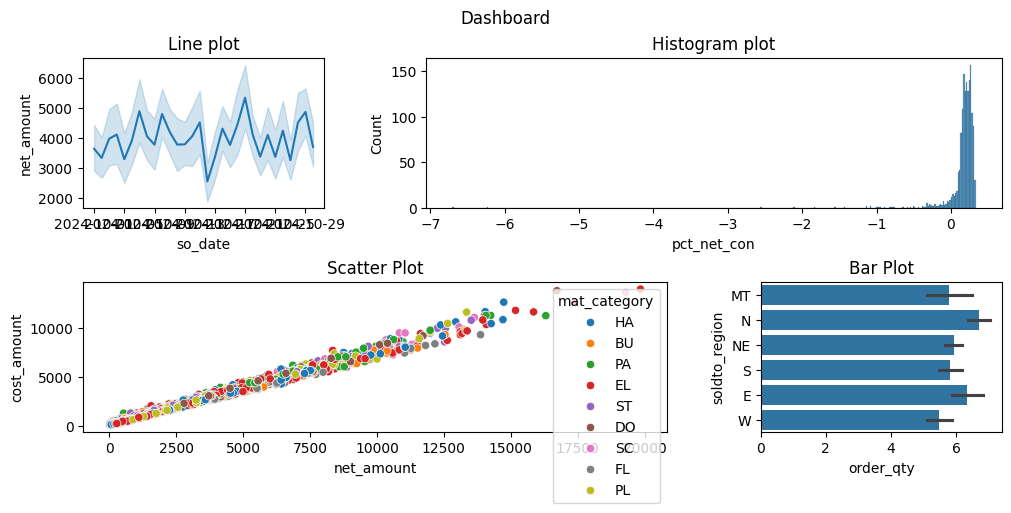

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig = plt.figure(figsize=(10, 5), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

ax00 = fig.add_subplot(spec[0, 0:1])
ax01 = fig.add_subplot(spec[0, 1:])

ax10 = fig.add_subplot(spec[1, 0:2])
ax11 = fig.add_subplot(spec[1, 2:])

sns.lineplot(data=df, x="so_date", y="net_amount", ax=ax00)
sns.histplot(data=df, x="pct_net_con", ax=ax01)

sns.scatterplot(data=df, x="net_amount", y="cost_amount", hue="mat_category", ax=ax10)
sns.barplot(data=df, x="order_qty", y="soldto_region", ax=ax11)

fig.suptitle("Dashboard")
ax00.title.set_text("Line plot")
ax01.title.set_text("Histogram plot")
ax10.title.set_text("Scatter Plot")
ax11.title.set_text("Bar Plot")

# Time Series Forecasting

In [ ]:
from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client(project=project_id)

# Configure your query
query = '''
select
    so_date, sum(net_amount) as total_amount
from
    `replace with yours`
group by
    so_date
'''

# Run the query and convert results to a pandas DataFrame
df = client.query(query).to_dataframe()

In [ ]:
from prophet import Prophet

In [ ]:
df = df.rename(columns={'so_date': 'ds', 'total_amount': 'y'})

In [ ]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpulcyt994/t7281wav.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpulcyt994/gb5c7w24.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4573', 'data', 'file=/tmp/tmpulcyt994/t7281wav.json', 'init=/tmp/tmpulcyt994/gb5c7w24.json', 'output', 'file=/tmp/tmpulcyt994/prophet_model3hk07_ym/prophet_model-20241116043621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:36:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:36:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=15)
future.tail(3)

,ds
316,2024-11-12
317,2024-11-13
318,2024-11-14


In [ ]:
forecast = m.predict(future)
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-01,211260.051249,162768.624914,262148.367657,211260.051249,211260.051249,-347.156361,-347.156361,-347.156361,-347.156361,-347.156361,-347.156361,0.0,0.0,0.0,210912.894888
1,2024-01-02,211242.678799,164483.072797,267171.512084,211242.678799,211242.678799,5219.772097,5219.772097,5219.772097,5219.772097,5219.772097,5219.772097,0.0,0.0,0.0,216462.450895
2,2024-01-03,211225.306348,156318.203624,257705.563921,211225.306348,211225.306348,-5023.502968,-5023.502968,-5023.502968,-5023.502968,-5023.502968,-5023.502968,0.0,0.0,0.0,206201.803380


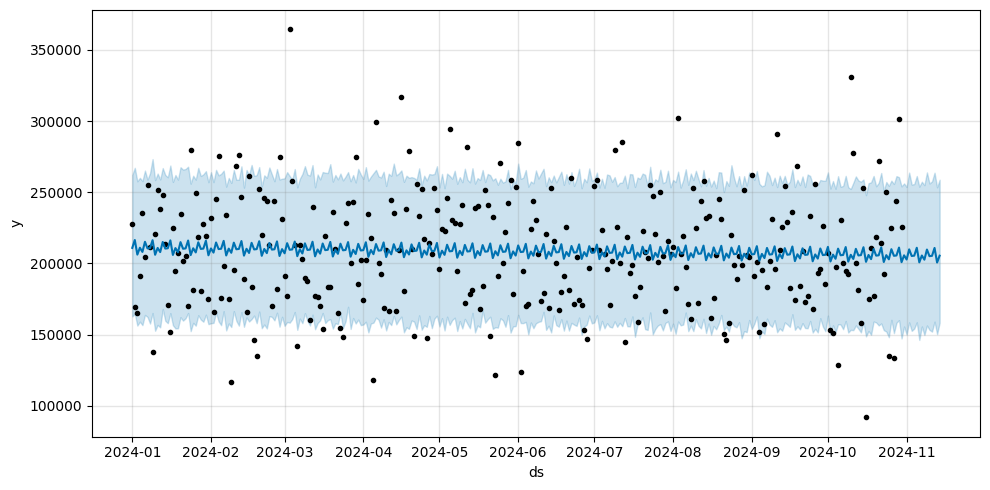

In [ ]:
fig1 = m.plot(forecast, figsize=(10, 5))

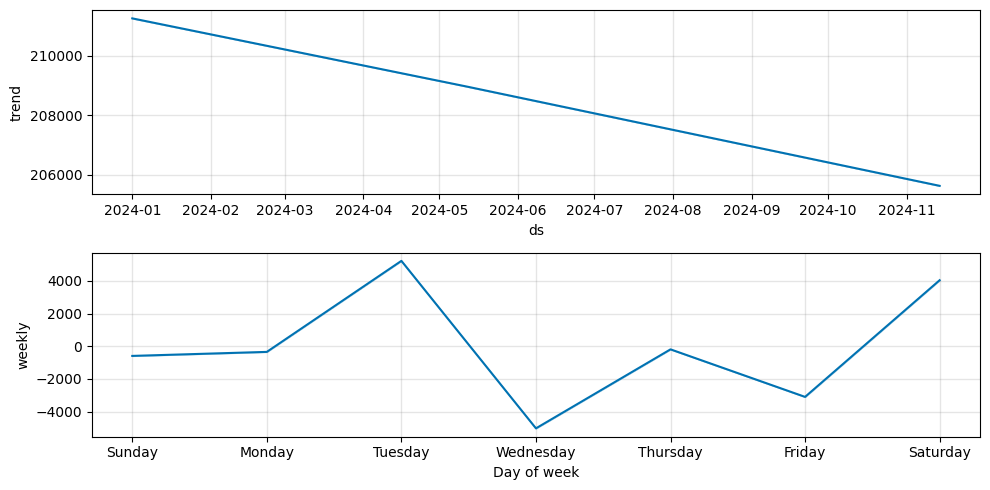

In [ ]:
fig2 = m.plot_components(forecast, figsize=(10, 5))